Solos da Amazônia Legal

As informações dos solos dizem respeito ao enquadramento taxonômico em um sistema organizado (Sistema Brasileiro de Classificaçãode Solos), distribuição espacial, textura e relevo de ocorrência, entre outras. Os pontos contém informações físicas, químicase mineralógicas, importantes para a caracterização e enquadramento dos solos neste sistema.

https://dados.gov.br/dataset/cren_pedologiaamazonialegal_250

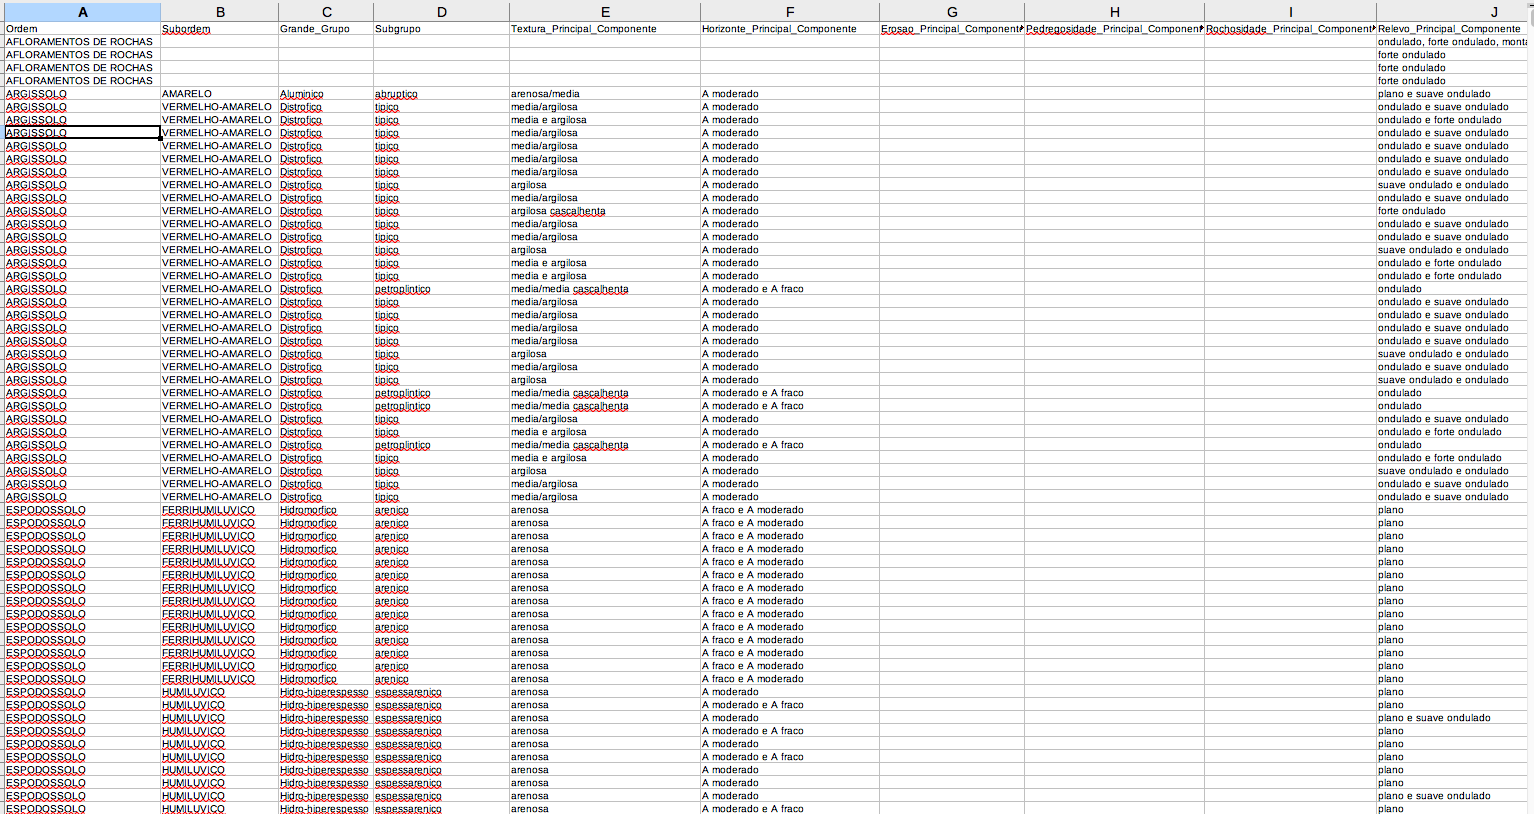

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy
import scipy.stats
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_line, geom_point

In [2]:
file = 'SolosAmazoniaLegal.csv'
df = pd.read_csv(file)

In [3]:
df

,Ordem,Subordem,Grande_Grupo,Subgrupo,Textura_Principal_Componente,Horizonte_Principal_Componente,Erosao_Principal_Componente,Pedregosidade_Principal_Componente,Rochosidade_Principal_Componente,Relevo_Principal_Componente
0,AFLORAMENTOS DE ROCHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ondulado, forte ondulado, montanhoso e escarpado"
1,AFLORAMENTOS DE ROCHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,forte ondulado
2,AFLORAMENTOS DE ROCHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,forte ondulado
3,AFLORAMENTOS DE ROCHAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,forte ondulado
4,ARGISSOLO,AMARELO,Aluminico,abruptico,arenosa/media,A moderado,NaN,NaN,NaN,plano e suave ondulado
...,...,...,...,...,...,...,...,...,...,...
40686,PLINTOSSOLO,PETRICO,Concrecionario,tipico e leptico,argilosa muito cascalhenta e media muito casca...,A moderado,NaN,NaN,NaN,forte ondulado e ondulado
40687,PLINTOSSOLO,PETRICO,Concrecionario,tipico e leptico,argilosa muito cascalhenta e media muito casca...,A moderado,NaN,NaN,NaN,forte ondulado e ondulado
40688,PLINTOSSOLO,PETRICO,Concrecionario,tipico e leptico,argilosa muito cascalhenta e media muito casca...,A moderado,NaN,NaN,NaN,forte ondulado e ondulado
40689,PLINTOSSOLO,PETRICO,Concrecionario,tipico e leptico,argilosa muito cascalhenta e media muito casca...,A moderado,NaN,NaN,NaN,forte ondulado e ondulado


In [4]:
df.isna().sum()

Ordem                                     0
Subordem                                368
Grande_Grupo                            368
Subgrupo                                368
Textura_Principal_Componente            368
Horizonte_Principal_Componente          368
Erosao_Principal_Componente           40343
Pedregosidade_Principal_Componente    39386
Rochosidade_Principal_Componente      40107
Relevo_Principal_Componente               4
dtype: int64

In [5]:
# tipos de solo (classes) - 1 a 15
df['Ordem'] = df['Ordem'].str.replace("AFLORAMENTOS DE ROCHAS", "1")
df['Ordem'] = df['Ordem'].str.replace("ARGISSOLO", "2")
df['Ordem'] = df['Ordem'].str.replace("CAMBISSOLO", "3")
df['Ordem'] = df['Ordem'].str.replace("CHERNOSSOLO", "4")
df['Ordem'] = df['Ordem'].str.replace("DUNAS", "5")
df['Ordem'] = df['Ordem'].str.replace("ESPODOSSOLO", "6")
df['Ordem'] = df['Ordem'].str.replace("GLEISSOLO", "7")
df['Ordem'] = df['Ordem'].str.replace("LATOSSOLO", "8")
df['Ordem'] = df['Ordem'].str.replace("LUVISSOLO", "9")
df['Ordem'] = df['Ordem'].str.replace("NEOSSOLO", "10")
df['Ordem'] = df['Ordem'].str.replace("NITOSSOLO", "11")
df['Ordem'] = df['Ordem'].str.replace("ORGANOSSOLO", "12")
df['Ordem'] = df['Ordem'].str.replace("PLANOSSOLO", "13")
df['Ordem'] = df['Ordem'].str.replace("PLINTOSSOLO", "14")
df['Ordem'] = df['Ordem'].str.replace("VERTISSOLO", "15")

# features

df['Subordem'] = df['Subordem'].str.replace("VERMELHO-AMARELO", "21")
df['Subordem'] = df['Subordem'].str.replace("ACINZENTADO", "1")
df['Subordem'] = df['Subordem'].str.replace("AMARELO", "2")
df['Subordem'] = df['Subordem'].str.replace("ARGILUVICO", "3")
df['Subordem'] = df['Subordem'].str.replace("BRUNO", "4")
df['Subordem'] = df['Subordem'].str.replace("CROMICO", "5")
df['Subordem'] = df['Subordem'].str.replace("EBANICO", "6")
df['Subordem'] = df['Subordem'].str.replace("FERRIHUMILUVICO", "7")
df['Subordem'] = df['Subordem'].str.replace("FLUVICO", "8")
df['Subordem'] = df['Subordem'].str.replace("HAPLICO", "9")
df['Subordem'] = df['Subordem'].str.replace("HIDROMORFICO", "10")
df['Subordem'] = df['Subordem'].str.replace("HUMILUVICO", "11")
df['Subordem'] = df['Subordem'].str.replace("LITOLICO", "12")
df['Subordem'] = df['Subordem'].str.replace("MELANICO", "13")
df['Subordem'] = df['Subordem'].str.replace("NATRICO", "14")
df['Subordem'] = df['Subordem'].str.replace("PETRICO", "15")
df['Subordem'] = df['Subordem'].str.replace("QUARTZARENICO", "16")
df['Subordem'] = df['Subordem'].str.replace("REGOLITICO", "17")
df['Subordem'] = df['Subordem'].str.replace("SALICO", "18")
df['Subordem'] = df['Subordem'].str.replace("TIOMORFICO", "19")
df['Subordem'] = df['Subordem'].str.replace("VERMELHO", "20")

df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Ta Distrofico", "20")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Ta Eutrofico", "21")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Tb Distrofico", "22")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Tb Eutrofico", "23")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Hidro-hiperespesso", "12")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Acrico", "1")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Acriferrico", "2")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Alitico", "3")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Aluminico", "4")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Carbonatico", "5")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Chernossolico", "6")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Concrecionario", "7")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Distroferrico", "8")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Distrofico", "9")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Eutroferrico", "10")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Eutrofico", "11")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Hidromorfico", "13")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Humico", "14")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Litoplintico", "15")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Ortico", "16")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Palico", "17")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Saprico", "18")
df['Grande_Grupo'] = df['Grande_Grupo'].str.replace("Sodico", "19")

df['Subgrupo'] = df['Subgrupo'].str.replace("abruptico e tipico", "2")
df['Subgrupo'] = df['Subgrupo'].str.replace("arenico abruptico", "4")
df['Subgrupo'] = df['Subgrupo'].str.replace("arenico e tipico", "5")
df['Subgrupo'] = df['Subgrupo'].str.replace("arenico, abruptico e sodico", "6")
df['Subgrupo'] = df['Subgrupo'].str.replace("argissolico e cambissolico", "8")
df['Subgrupo'] = df['Subgrupo'].str.replace("argissolico e latossolico", "9")
df['Subgrupo'] = df['Subgrupo'].str.replace("argissolico e plintico", "10")
df['Subgrupo'] = df['Subgrupo'].str.replace("argissolico e tipico", "11")
df['Subgrupo'] = df['Subgrupo'].str.replace("cambissolico e tipico", "13")
df['Subgrupo'] = df['Subgrupo'].str.replace("chernossolico e leptico", "15")
df['Subgrupo'] = df['Subgrupo'].str.replace("chernossolico e plintico", "16")
df['Subgrupo'] = df['Subgrupo'].str.replace("espessarenico e arenico", "18")
df['Subgrupo'] = df['Subgrupo'].str.replace("humico, tipico e umbrico", "22")
df['Subgrupo'] = df['Subgrupo'].str.replace("latossolico e tipico", "24")
df['Subgrupo'] = df['Subgrupo'].str.replace("leptico e litico", "26")
df['Subgrupo'] = df['Subgrupo'].str.replace("leptico e tipico", "27")
df['Subgrupo'] = df['Subgrupo'].str.replace("neofluvissolico e tipico", "30")
df['Subgrupo'] = df['Subgrupo'].str.replace("petroplintico e latossolico", "34")
df['Subgrupo'] = df['Subgrupo'].str.replace("petroplintico e plintico", "35")
df['Subgrupo'] = df['Subgrupo'].str.replace("petroplintico e tipico", "36")
df['Subgrupo'] = df['Subgrupo'].str.replace("petroplintico e umbrico", "37")
df['Subgrupo'] = df['Subgrupo'].str.replace("petroplintico, tipico e umbrico", "38")
df['Subgrupo'] = df['Subgrupo'].str.replace("plintico e petroplintico", "40")
df['Subgrupo'] = df['Subgrupo'].str.replace("plintico e tipico", "41")
df['Subgrupo'] = df['Subgrupo'].str.replace("plintico, tipico e umbrico", "42")
df['Subgrupo'] = df['Subgrupo'].str.replace("salico e solodico", "43")
df['Subgrupo'] = df['Subgrupo'].str.replace("solodico e tipico", "46")
df['Subgrupo'] = df['Subgrupo'].str.replace("solodico e vertissolico", "47")
df['Subgrupo'] = df['Subgrupo'].str.replace("tipico e abruptico", "49")
df['Subgrupo'] = df['Subgrupo'].str.replace("tipico e arenico", "50")
df['Subgrupo'] = df['Subgrupo'].str.replace("tipico e argissolico", "51")
df['Subgrupo'] = df['Subgrupo'].str.replace("tipico e chernossolico", "52")
df['Subgrupo'] = df['Subgrupo'].str.replace("tipico e gleissolico", "53")
df['Subgrupo'] = df['Subgrupo'].str.replace("tipico e latossolico", "54")
df['Subgrupo'] = df['Subgrupo'].str.replace("tipico e leptico", "55")
df['Subgrupo'] = df['Subgrupo'].str.replace("tipico e petroplintico", "56")
df['Subgrupo'] = df['Subgrupo'].str.replace("tipico e plintico", "57")
df['Subgrupo'] = df['Subgrupo'].str.replace("tipico e solodico", "58")
df['Subgrupo'] = df['Subgrupo'].str.replace("tipico e umbrico", "59")
df['Subgrupo'] = df['Subgrupo'].str.replace("tipico, plintico e umbrico", "60")
df['Subgrupo'] = df['Subgrupo'].str.replace("umbrico e tipico", "62")
df['Subgrupo'] = df['Subgrupo'].str.replace("vertissolico e tipico", "64")
df['Subgrupo'] = df['Subgrupo'].str.replace("vertissolico", "63")
df['Subgrupo'] = df['Subgrupo'].str.replace("abruptico", "1")
df['Subgrupo'] = df['Subgrupo'].str.replace("espessarenico", "17")
df['Subgrupo'] = df['Subgrupo'].str.replace("arenico", "3")
df['Subgrupo'] = df['Subgrupo'].str.replace("argissolico", "7")
df['Subgrupo'] = df['Subgrupo'].str.replace("cambissolico", "12")
df['Subgrupo'] = df['Subgrupo'].str.replace("espesso", "19")
df['Subgrupo'] = df['Subgrupo'].str.replace("fragmentario", "20")
df['Subgrupo'] = df['Subgrupo'].str.replace("histico", "21")
df['Subgrupo'] = df['Subgrupo'].str.replace("chernossolico", "14")
df['Subgrupo'] = df['Subgrupo'].str.replace("latossolico", "23")
df['Subgrupo'] = df['Subgrupo'].str.replace("leptico", "25")
df['Subgrupo'] = df['Subgrupo'].str.replace("neofluvissolico", "29")
df['Subgrupo'] = df['Subgrupo'].str.replace("neossolico", "31")
df['Subgrupo'] = df['Subgrupo'].str.replace("organossolico", "32")
df['Subgrupo'] = df['Subgrupo'].str.replace("petroplintico", "33")
df['Subgrupo'] = df['Subgrupo'].str.replace("plintico", "39")
df['Subgrupo'] = df['Subgrupo'].str.replace("saprolitico", "44")
df['Subgrupo'] = df['Subgrupo'].str.replace("litico", "28")
df['Subgrupo'] = df['Subgrupo'].str.replace("solodico", "45")
df['Subgrupo'] = df['Subgrupo'].str.replace("tipico", "48")
df['Subgrupo'] = df['Subgrupo'].str.replace("umbrico", "61")

df['Horizonte_Principal_Componente'] = df['Horizonte_Principal_Componente'].str.replace("A moderado, A proeminente e A turfoso", "12")
df['Horizonte_Principal_Componente'] = df['Horizonte_Principal_Componente'].str.replace("A proeminente e A moderado", "14")
df['Horizonte_Principal_Componente'] = df['Horizonte_Principal_Componente'].str.replace("A chernozemico e A moderado", "2")
df['Horizonte_Principal_Componente'] = df['Horizonte_Principal_Componente'].str.replace("A fraco e A moderado", "4")
df['Horizonte_Principal_Componente'] = df['Horizonte_Principal_Componente'].str.replace("A humico e A proeminente", "7")
df['Horizonte_Principal_Componente'] = df['Horizonte_Principal_Componente'].str.replace("A moderado e A chernozemico", "9")
df['Horizonte_Principal_Componente'] = df['Horizonte_Principal_Componente'].str.replace("A moderado e A fraco", "10")
df['Horizonte_Principal_Componente'] = df['Horizonte_Principal_Componente'].str.replace("A moderado e A proeminente", "11")
df['Horizonte_Principal_Componente'] = df['Horizonte_Principal_Componente'].str.replace("A fraco", "3")
df['Horizonte_Principal_Componente'] = df['Horizonte_Principal_Componente'].str.replace("A histico", "5")
df['Horizonte_Principal_Componente'] = df['Horizonte_Principal_Componente'].str.replace("A humico", "6")
df['Horizonte_Principal_Componente'] = df['Horizonte_Principal_Componente'].str.replace("A chernozemico", "1")
df['Horizonte_Principal_Componente'] = df['Horizonte_Principal_Componente'].str.replace("A moderado", "8")
df['Horizonte_Principal_Componente'] = df['Horizonte_Principal_Componente'].str.replace("A proeminente", "13")

df['Erosao_Principal_Componente'] = df['Erosao_Principal_Componente'].str.replace("erodida e nao erodida", "2")
df['Erosao_Principal_Componente'] = df['Erosao_Principal_Componente'].str.replace("erodida", "1")

df['Pedregosidade_Principal_Componente'] = df['Pedregosidade_Principal_Componente'].str.replace("nao pedregosa e pedregosa I", "1")
df['Pedregosidade_Principal_Componente'] = df['Pedregosidade_Principal_Componente'].str.replace("pedregosa I e nao pedregosa", "3")
df['Pedregosidade_Principal_Componente'] = df['Pedregosidade_Principal_Componente'].str.replace("pedregosa II", "4")
df['Pedregosidade_Principal_Componente'] = df['Pedregosidade_Principal_Componente'].str.replace("pedregosa I", "2")

df['Rochosidade_Principal_Componente'] = df['Rochosidade_Principal_Componente'].str.replace("rochosa e nao rochosa", "2")
df['Rochosidade_Principal_Componente'] = df['Rochosidade_Principal_Componente'].str.replace("rochosa", "1")

df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("ondulado, forte ondulado e montanhoso", "16")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("ondulado, forte ondulado e suave ondulado", "17")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("ondulado, forte ondulado, montanhoso e escarpado", "18")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("forte ondulado, montanhoso e escarpado", "7")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("forte ondulado, ondulado e suave ondulado", "8")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("montanhoso, forte ondulado e ondulado", "12")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("escarpado e forte ondulado", "2")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("forte ondulado e escarpado", "4")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("forte ondulado e montanhoso", "5")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("forte ondulado e ondulado", "6")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("plano, suave ondulado e ondulado", "21")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("plano e suave ondulado", "20")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("montanhoso e escarpado", "10")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("montanhoso e forte ondulado", "11")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("suave ondulado, ondulado e plano", "27")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("suave ondulado, ondulado e forte ondulado", "26")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("ondulado e forte ondulado", "14")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("suave ondulado e suave ondulado", "25")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("ondulado e suave ondulado", "15")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("suave ondulado e plano", "24")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("suave ondulado e ondulado", "23")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("escarpado", "1")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("forte ondulado", "3")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("suave ondulado", "22")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("plano", "19")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("ondulado", "13")
df['Relevo_Principal_Componente'] = df['Relevo_Principal_Componente'].str.replace("montanhoso", "9")

In [6]:
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/argilosa cascalhenta, argilosa cascalhenta/muito argilosa cascalhenta, media/argilosa e argilosa/muito argilosa", "114")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa, media cascalhenta/argilosa cascalhenta, argilosa/muito argilosa e argilosa cascalhenta/muito argilosa cascalhenta", "210")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa muito cascalhenta/media muito cascalhenta e media muito cascalhenta/argilosa muito cascalhenta", "10")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta/argilosa cascalhenta, media cascalhenta/argilosa e media cascalhenta/muito argilosa cascalhenta", "146")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa pouco cascalhenta/muito argilosa pouco cascalhenta e media pouco cascalhenta/argilosa pouco cascalhenta", "67")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media pouco cascalhenta/argilosa pouco cascalhenta e arenosa pouco cascalhenta/media pouco cascalhenta", "159")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta/argilosa muito cascalhenta e arenosa muito cascalhenta/media muito cascalhenta", "148")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa muito cascalhenta/muito argilosa muito cascalhenta e argilosa/muito argilosa muito cascalhenta", "63")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa cascalhenta/media cascalhenta, media cascalhenta/argilosa cascalhenta, arenosa/media e media/argilosa", "4")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media pouco cascalhenta/argilosa cascalhenta e arenosa pouco cascalhenta/argilosa", "157")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta, media cascalhenta/argilosa cascalhenta, media e media/argilosa", "103")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta/argilosa muito cascalhenta e media cascalhenta/argilosa cascalhenta", "150")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa, media pouco cascalhenta/argilosa cascalhenta e media/argilosa cascalhenta", "211")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa cascalhenta, media cascalhenta/argilosa e argilosa/argilosa muito cascalhenta", "181")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/argilosa cascalhenta e argilosa cascalhenta/muito argilosa cascalhenta", "108")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media, media/argilosa, media cascalhenta e media cascalhenta/argilosa cascalhenta", "173")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/media, media cascalhenta/argilosa, media/media cascalhenta e media", "125")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta, arenosa cascalhenta/media cascalhenta, media e arenosa/media", "99")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta/argilosa muito cascalhenta e argilosa muito cascalhenta", "149")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta, media cascalhenta/argilosa cascalhenta e media/argilosa", "102")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/media, media cascalhenta/argilosa, media e media/argilosa", "124")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta e media muito cascalhenta/argilosa muito cascalhenta", "142")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta/argilosa muito cascalhenta e media muito cascalhenta", "151")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta/argilosa muito cascalhenta e siltosa muito cascalhenta", "152")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media, media/argilosa, arenosa cascalhenta/media e media cascalhenta/media", "171")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/media cascalhenta, arenosa/media cascalhenta e media/argilosa cascalhenta", "217")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa, media/argilosa, argilosa cascalhenta/argilosa e media cascalhenta/argilosa", "70")

df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta e arenosa muito cascalhenta/media muito cascalhenta", "142")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa muito cascalhenta/media muito cascalhenta e media muito cascalhenta", "9")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa muito cascalhenta/argilosa e argilosa/argilosa muito cascalhenta", "61")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa pouco cascalhenta/muito argilosa cascalhenta e media/argilosa", "66")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e media muito cascalhenta/argilosa muito cascalhenta", "196")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa, argilosa, media cascalhenta e argilosa cascalhenta", "209")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/argilosa cascalhenta e media muito cascalhenta", "111")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/argilosa cascalhenta e media/media cascalhenta", "113")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/argilosa muito cascalhenta e media/argilosa", "117")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media, media/argilosa, media cascalhenta e media cascalhenta/argilosa", "172")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa cascalhenta, media/media muito cascalhenta e media", "182")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e argilosa cascalhenta/muito argilosa cascalhenta", "186")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e argilosa cascalhenta/muito argilosa pouco cascalhenta", "187")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa, arenosa cascalhenta/media cascalhenta e media", "205")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e media cascalhenta/argilosa muito cascalhenta", "194")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media pouco cascalhenta e media pouco cascalhenta/argilosa cascalhenta", "154")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media, argilosa, media cascalhenta e argilosa cascalhenta/argilosa", "166")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media, media cascalhenta e media cascalhenta/argilosa cascalhenta", "167")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta/argilosa cascalhenta e media/argilosa", "145")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media, media/argilosa e media cascalhenta/argilosa cascalhenta", "169")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media, argilosa, media cascalhenta e argilosa cascalhenta", "165")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/media, arenosa cascalhenta/media cascalhenta e media", "30")

df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/argilosa cascalhenta e media/argilosa", "112")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/argilosa e media/argilosa cascalhenta", "115")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/media e argilosa cascalhenta/argilosa", "120")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa muito cascalhenta/muito argilosa muito cascalhenta", "62")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta e media cascalhenta/argilosa cascalhenta", "98")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta, argilosa cascalhenta, media e argilosa", "101")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta, media, arenosa cascalhenta e arenosa", "104")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa/argilosa cascalhenta e media/media cascalhenta", "74")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/media e media cascalhenta/argilosa", "123")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/media e arenosa cascalhenta/media cascalhenta", "24")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa cascalhenta e argilosa muito cascalhenta", "38")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa e media pouco cascalhenta/argilosa cascalhenta", "53")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa muito cascalhenta e media muito cascalhenta", "58")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/argilosa cascalhenta e media cascalhenta", "110")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa pouco cascalhenta/argilosa muito cascalhenta", "64")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/media cascalhenta e argilosa cascalhenta", "214")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/media cascalhenta e argilosa/argilosa cascalhenta", "215")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/media cascalhenta e media/argilosa cascalhenta", "216")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/media muito cascalhenta e media muito cascalhenta", "219")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e media cascalhenta/argilosa cascalhenta", "193")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/media, arenosa/argilosa, media e media/argilosa", "32")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e media muito cascalhenta/argilosa", "195")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/media, arenosa/argilosa e media/argilosa", "31")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa/argilosa cascalhenta, media e argilosa", "75")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa muito cascalhenta e media/argilosa", "59")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa muito cascalhenta/argilosa e argilosa", "60")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa, argilosa cascalhenta e muito argilosa", "68")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa cascalhenta e muito argilosa cascalhenta", "41")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("indiscriminada muito cascalhenta e indiscriminada", "90")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta, argilosa cascalhenta e media", "100")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa, argilosa e argilosa/muito argilosa", "206")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/arenosa pouco cascalhenta e arenosa", "15")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa cascalhenta/argilosa e argilosa", "42")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa pouco cascalhenta/muito argilosa", "65")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa muito cascalhenta e argilosa", "57")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa, media/argilosa e arenosa/media", "69")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa, siltosa e argilosa/muito argilosa", "71")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa/argilosa cascalhenta e argilosa", "73")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa cascalhenta/argilosa muito cascalhenta", "43")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa cascalhenta/muito argilosa cascalhenta", "44")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa muito cascalhenta/media muito cascalhenta", "8")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa pouco cascalhenta/media cascalhenta", "11")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa pouco cascalhenta/media pouco cascalhenta", "12")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa cascalhenta e media cascalhenta", "39")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa e argilosa/argilosa cascalhenta", "48")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa cascalhenta/media cascalhenta", "3")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/media, argilosa e media/argilosa", "33")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/media, media e media/argilosa", "34")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/media cascalhenta e arenosa/media", "23")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/media e arenosa/argilosa", "25")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e media/argilosa cascalhenta", "197")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e media/media pouco cascalhenta", "198")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/siltosa, siltosa e siltosa/argilosa", "221")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("muito argilosa cascalhenta e muito argilosa", "224")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("muito argilosa cascalhenta/muito argilosa", "225")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("muito argilosa e muito argilosa cascalhenta", "228")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa, argilosa e muito argilosa", "208")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa, siltosa/argilosa e siltosa", "212")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa/muito argilosa e media/argilosa", "80")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa/muito argilosa e muito argilosa", "81")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa/muito argilosa muito cascalhenta", "82")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa/muito argilosa, argilosa e media", "83")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("indiscriminada cascalhenta e indiscriminada", "87")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("indiscriminada e indiscriminada cascalhenta", "88")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/argilosa cascalhenta e argilosa", "107")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/argilosa cascalhenta e media", "109")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/argilosa muito cascalhenta", "116")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/argilosa pouco cascalhenta", "118")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/media e media cascalhenta", "122")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("indiscriminada muito cascalhenta", "89")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa/argilosa muito cascalhenta", "76")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa/argilosa pouco cascalhenta", "77")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa/muito argilosa e argilosa", "79")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta e arenosa cascalhenta", "94")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta e argilosa cascalhenta", "96")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media e media cascalhenta/media muito cascalhenta", "131")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta e arenosa muito cascalhenta", "138")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta e argilosa muito cascalhenta", "140")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta/argilosa muito cascalhenta", "147")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta/argilosa pouco cascalhenta", "153")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa cascalhenta e media/media cascalhenta", "180")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa cascalhenta e media/media cascalhenta", "40")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa pouco cascalhenta e media/argilosa", "204")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media, media/argilosa e media cascalhenta/argilosa", "168")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media pouco cascalhenta/argilosa pouco cascalhenta", "158")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e media cascalhenta/argilosa", "192")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa e media cascalhenta/argilosa", "52")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta/argilosa cascalhenta", "144")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media pouco cascalhenta/argilosa cascalhenta", "156")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media pouco cascalhenta/media cascalhenta", "160")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media e media/media muito cascalhenta", "135")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/media e media", "121")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/argilosa cascalhenta", "106")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media e media/argilosa cascalhenta", "133")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa cascalhenta e arenosa/media", "178")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa cascalhenta e media/argilosa", "179")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e argilosa muito cascalhenta", "188")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e argilosa/muito argilosa", "189")

df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa e argilosa muito cascalhenta", "46")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa e argilosa pouco cascalhenta", "47")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/argilosa e media/argilosa", "19")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/argilosa e arenosa/media", "17")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/argilosa e media", "18")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/argilosa e muito argilosa", "20")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/media cascalhenta", "22")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa/argilosa cascalhenta", "72")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/media e media cascalhenta", "27")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa e argilosa/muito argilosa", "49")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/media e media/argilosa", "28")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/media pouco cascalhenta", "29")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa cascalhenta e argilosa", "37")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa e argilosa cascalhenta", "45")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media e argilosa cascalhenta", "129")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media e media cascalhenta", "130")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e media cascalhenta", "191")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa e media cascalhenta", "51")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta e media", "141")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta/argilosa", "143")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media pouco cascalhenta/argilosa", "155")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media, arenosa e argilosa", "161")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media, argilosa e arenosa/media", "162")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media, argilosa e media/argilosa", "163")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media, argilosa e muito argilosa", "164")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media, media/argilosa e siltosa", "170")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media e media/media cascalhenta", "134")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e muito argilosa", "199")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e siltosa/argilosa", "201")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa muito cascalhenta", "202")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa pouco cascalhenta", "203")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("muito argilosa muito cascalhenta", "229")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("muito argilosa, argilosa e media", "230")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa, argilosa e media", "207")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa e media/argilosa", "54")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa e muito argilosa", "55")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa muito cascalhenta", "56")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa/siltosa e argilosa", "84")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("indiscriminada cascalhenta", "86")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media e arenosa/media", "127")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa/muito argilosa", "78")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/media e media", "26")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa cascalhenta", "177")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e arenosa/argilosa", "183")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e arenosa/media", "184")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e argilosa", "185")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/media muito cascalhenta", "218")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/media cascalhenta", "213")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e siltosa", "200")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/argilosa", "16")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa e media", "190")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("muito argilosa e media", "227")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa e media", "50")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa e arenosa/media", "5")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media e media/argilosa", "132")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa e media", "6")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media e arenosa", "126")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa, media e argilosa", "13")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media e argilosa", "128")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta e arenosa", "93")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta e argilosa", "95")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta e media", "97")

df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/argilosa", "105")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta/media", "119")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa muito cascalhenta", "7")

df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/arenosa cascalhenta", "14")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media e muito argilosa", "136")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media muito cascalhenta", "137")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media, siltosa e argilosa", "174")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/arenosa", "175")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("muito argilosa cascalhenta", "223")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("muito argilosa e argilosa", "226")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("siltosa e media/argilosa", "233")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa cascalhenta", "36")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media cascalhenta", "92")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("siltosa/argilosa", "234")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/muito argilosa", "220")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media/argilosa", "176")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa cascalhenta", "2")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa/media", "21")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("muito argilosa", "222")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("indiscriminada", "85")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("arenosa", "1")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("argilosa", "35")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("media", "91")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("orgânica", "231")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("organica", "231")
df['Textura_Principal_Componente'] = df['Textura_Principal_Componente'].str.replace("siltosa", "232")


In [7]:
df=df.fillna(0)

In [8]:
df

,Ordem,Subordem,Grande_Grupo,Subgrupo,Textura_Principal_Componente,Horizonte_Principal_Componente,Erosao_Principal_Componente,Pedregosidade_Principal_Componente,Rochosidade_Principal_Componente,Relevo_Principal_Componente
0,1,0,0,0,0,0,0,0,0,18
1,1,0,0,0,0,0,0,0,0,3
2,1,0,0,0,0,0,0,0,0,3
3,1,0,0,0,0,0,0,0,0,3
4,2,2,4,1,21,8,0,0,0,20
...,...,...,...,...,...,...,...,...,...,...
40686,14,15,7,55,58,8,0,0,0,6
40687,14,15,7,55,58,8,0,0,0,6
40688,14,15,7,55,58,8,0,0,0,6
40689,14,15,7,55,58,8,0,0,0,6


In [9]:
# dataset com classe e qtd
idx = df['Ordem'].value_counts().keys().to_numpy()
qtd = df['Ordem'].value_counts().to_numpy()

unido=np.stack((idx,qtd),axis=1)

ds = pd.DataFrame({'Column1': unido[:, 0], 'Column2': unido[:, 1]}) 
ds.columns = ['id', 'qtd']


In [10]:
ds

,id,qtd
0,10,9245
1,2,8807
2,7,8336
3,8,8288
4,14,2490
5,6,1727
6,3,619
7,1,367
8,9,257
9,11,223


In [11]:
#!pip install plotnine

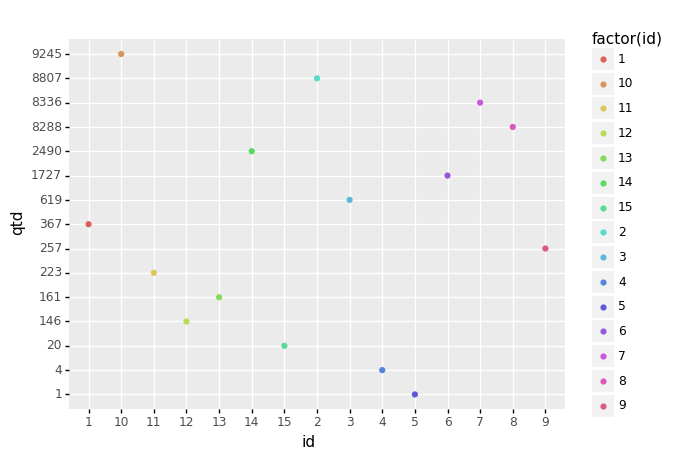

<ggplot: (274303389)>

In [12]:
(
    ggplot(ds,aes(x="id", y="qtd"))
    + geom_point(aes(color='factor(id)'))
)

In [13]:
k = math.ceil(1+3.3*math.log10(df.size))
k

20

(array([3.670e+02, 8.807e+03, 1.727e+03, 0.000e+00, 8.288e+03, 9.245e+03,
        0.000e+00, 8.336e+03, 2.230e+02, 0.000e+00, 1.610e+02, 2.490e+03,
        6.190e+02, 0.000e+00, 2.570e+02, 4.000e+00, 0.000e+00, 2.000e+01,
        1.000e+00, 1.460e+02]),
 array([ 0. ,  0.7,  1.4,  2.1,  2.8,  3.5,  4.2,  4.9,  5.6,  6.3,  7. ,
         7.7,  8.4,  9.1,  9.8, 10.5, 11.2, 11.9, 12.6, 13.3, 14. ]),
 <BarContainer object of 20 artists>)

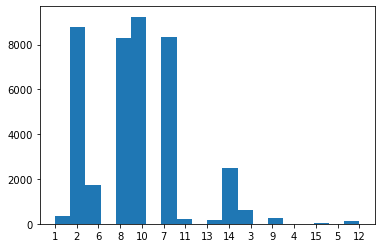

In [14]:
# histograma
plt.hist(df["Ordem"],bins=k)

/Volumes/Dados/User/Patricia/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:xlabel='Ordem', ylabel='Density'>

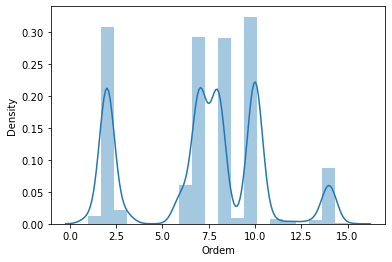

In [15]:
# https://seaborn.pydata.org/generated/seaborn.distplot.html
import seaborn as sns
sns.distplot(df['Ordem'], bins=20)

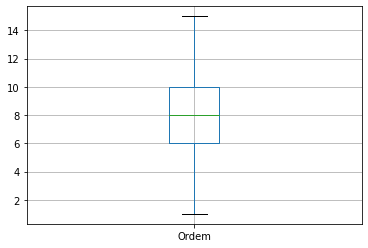

In [32]:
boxplot = df.boxplot(column=['Ordem'])

In [33]:
# spearman: -1 a 1
# Não requer que as variáveis sigam uma distribuição específica
df.corr(method='spearman')

,Ordem,Subordem,Grande_Grupo,Subgrupo,Textura_Principal_Componente,Horizonte_Principal_Componente,Erosao_Principal_Componente,Pedregosidade_Principal_Componente,Rochosidade_Principal_Componente,Relevo_Principal_Componente
Ordem,1.000000,-0.349251,0.053019,0.102682,-0.121886,-0.008031,-0.108848,0.154134,0.089954,-0.084992
Subordem,-0.349251,1.000000,-0.341183,-0.069341,0.119893,-0.076873,0.090885,0.036197,0.035664,0.034227
Grande_Grupo,0.053019,-0.341183,1.000000,0.125396,-0.244038,0.141218,-0.061320,-0.091576,-0.056960,-0.106586
Subgrupo,0.102682,-0.069341,0.125396,1.000000,0.067651,0.129468,0.024307,0.046219,0.005866,-0.095688
Textura_Principal_Componente,-0.121886,0.119893,-0.244038,0.067651,1.000000,-0.010160,0.086582,0.010712,0.044185,-0.128043
Horizonte_Principal_Componente,-0.008031,-0.076873,0.141218,0.129468,-0.010160,1.000000,-0.002737,-0.098650,-0.107045,0.026837
Erosao_Principal_Componente,-0.108848,0.090885,-0.061320,0.024307,0.086582,-0.002737,1.000000,-0.015334,-0.011207,-0.087541
Pedregosidade_Principal_Componente,0.154134,0.036197,-0.091576,0.046219,0.010712,-0.098650,-0.015334,1.000000,0.533897,-0.218827
Rochosidade_Principal_Componente,0.089954,0.035664,-0.056960,0.005866,0.044185,-0.107045,-0.011207,0.533897,1.000000,-0.159935
Relevo_Principal_Componente,-0.084992,0.034227,-0.106586,-0.095688,-0.128043,0.026837,-0.087541,-0.218827,-0.159935,1.000000


### Logistic Regression

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.multiclass import OneVsRestClassifier

In [19]:
df = df.astype('int')

In [20]:
# separando features e classes
y= df.Ordem
X = df.iloc[:,1:] #desconsidera coluna Ordem e recebe as demais

In [21]:
# removendo extremos
NewX = list()
NewY = list()
validY=[2,7,8] #tem qtdes proximas
for i in range(len(y)):
    if y.iloc[i] in validY:
        NewX.append(X.iloc[i,:])
        NewY.append(y.iloc[i]) 
X = pd.DataFrame(NewX, columns=['Subordem', 'Grande_Grupo', 'Subgrupo', 'Textura_Principal_Componente', 'Horizonte_Principal_Componente', 'Erosao_Principal_Componente', 'Pedregosidade_Principal_Componente', 'Rochosidade_Principal_Componente', 'Relevo_Principal_Componente'])
y = pd.DataFrame(NewY, columns=['Ordem'])

In [22]:
(unique, counts) = np.unique(y, return_counts=True)
print(unique)
print(counts)

[2 7 8]
[8807 8336 8288]


In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.label_binarize.html
from sklearn import preprocessing
y = preprocessing.label_binarize(y, classes=validY) #[1,2,3,4,5,6,7,8,9,10,11,12,13,14])
print(y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 ...
 [0 0 1]
 [0 0 1]
 [0 0 1]]


In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [25]:
print("Treinamento:")
print("X:", X_train.shape, "y:", y_train.shape)
print("Teste:")
print("X:", X_test.shape, "y:", y_test.shape)

Treinamento:
X: (17038, 9) y: (17038, 3)
Teste:
X: (8393, 9) y: (8393, 3)


In [26]:
model = Pipeline([('nor', MinMaxScaler()), ('LR', OneVsRestClassifier(LogisticRegression(multi_class='ovr')))])
params = {}

In [27]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
folds=10
gs = GridSearchCV(model, params, cv=folds, refit=True)

In [28]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('nor', MinMaxScaler()),
                                       ('LR',
                                        OneVsRestClassifier(estimator=LogisticRegression(multi_class='ovr')))]),
             param_grid={})

In [29]:
gs.cv_results_

{'mean_fit_time': array([0.25431042]),
 'std_fit_time': array([0.02117468]),
 'mean_score_time': array([0.00541823]),
 'std_score_time': array([0.00068662]),
 'params': [{}],
 'split0_test_score': array([0.77347418]),
 'split1_test_score': array([0.7629108]),
 'split2_test_score': array([0.76643192]),
 'split3_test_score': array([0.75469484]),
 'split4_test_score': array([0.77053991]),
 'split5_test_score': array([0.7629108]),
 'split6_test_score': array([0.75234742]),
 'split7_test_score': array([0.7834507]),
 'split8_test_score': array([0.7475044]),
 'split9_test_score': array([0.7475044]),
 'mean_test_score': array([0.76217694]),
 'std_test_score': array([0.01119147]),
 'rank_test_score': array([1], dtype=int32)}

In [30]:
y_pred = gs.predict(X_test)

In [31]:
print("Accuracy:")
print(accuracy_score(y_test, y_pred))

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("Matriz de confusao:")
confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

Accuracy:
0.7725485523650661
Matriz de confusao:


array([[2402,    7,  477],
       [   0, 2699,   71],
       [ 918,   12, 1807]])